In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

In [2]:
df = pd.read_csv("131k.csv")

In [3]:
df

,datetime,close
0,2019-01-01 18:02:00,2501.25
1,2019-01-01 18:03:00,2504.50
2,2019-01-01 18:04:00,2508.50
3,2019-01-01 18:05:00,2507.25
4,2019-01-01 18:06:00,2507.50
...,...,...
131067,2019-05-17 08:45:00,2847.25
131068,2019-05-17 08:46:00,2847.50
131069,2019-05-17 08:47:00,2847.00
131070,2019-05-17 08:48:00,2847.00


In [4]:
df2 = df.set_index('datetime')

In [5]:
df2

,close
datetime,
2019-01-01 18:02:00,2501.25
2019-01-01 18:03:00,2504.50
2019-01-01 18:04:00,2508.50
2019-01-01 18:05:00,2507.25
2019-01-01 18:06:00,2507.50
...,...
2019-05-17 08:45:00,2847.25
2019-05-17 08:46:00,2847.50
2019-05-17 08:47:00,2847.00


In [6]:
df2['logReturn'] = np.log(df2.close/df2.close.shift(1))

In [7]:
df2['sqrd_return'] = df2['logReturn']**2

In [8]:
df2['abs_return'] = df2['logReturn'].abs()

In [9]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2019-01-01 18:02:00,2501.25,NaN,NaN,NaN
2019-01-01 18:03:00,2504.50,0.001299,1.686120e-06,0.001299
2019-01-01 18:04:00,2508.50,0.001596,2.546741e-06,0.001596
2019-01-01 18:05:00,2507.25,-0.000498,2.484324e-07,0.000498
2019-01-01 18:06:00,2507.50,0.000100,9.941260e-09,0.000100
...,...,...,...,...
2019-05-17 08:45:00,2847.25,-0.000176,3.083277e-08,0.000176
2019-05-17 08:46:00,2847.50,0.000088,7.708869e-09,0.000088
2019-05-17 08:47:00,2847.00,-0.000176,3.083818e-08,0.000176


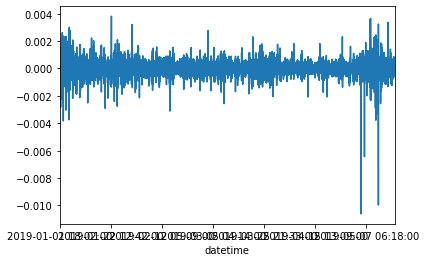

In [10]:
df2['logReturn'].plot()

In [11]:
def zscore(returns):
    return (returns-returns.mean())/np.std(returns)

In [12]:
normalized = zscore(df2.logReturn)

Text(0, 0.5, 'Normalized Returns')

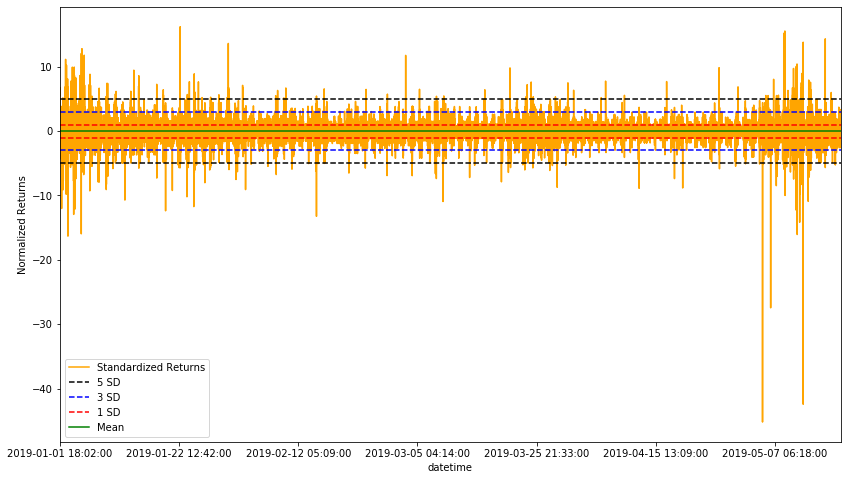

In [13]:
normalized.plot(figsize=(14,8),label='Standardized Returns',color='orange')
plt.axhline(normalized.std()*3,color='blue',ls='--')
plt.axhline(normalized.std()*5,color='black',ls='--')
plt.axhline(normalized.std()*-5,color='black',label='5 SD',ls='--')
plt.axhline(normalized.std()*-3,color='blue',label='3 SD',ls='--')
plt.axhline(normalized.std(),color='red',ls='--')
plt.axhline(normalized.std()*-1,color='red',ls='--',label='1 SD')
plt.axhline(normalized.mean(),color='green',label='Mean')
plt.legend()
plt.ylabel("Normalized Returns",size=10)

Text(0.5, 1.0, 'ACF LAG for Prices')

<Figure size 2160x1440 with 0 Axes>

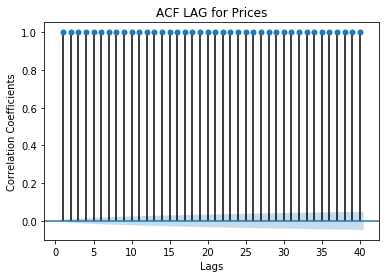

In [14]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.close,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Prices")

Text(0.5, 1.0, 'ACF LAG for Log Returns')

<Figure size 2160x1440 with 0 Axes>

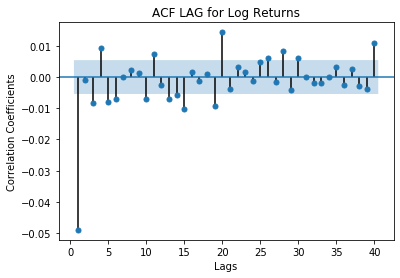

In [15]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.logReturn[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Log Returns")

Text(0.5, 1.0, 'ACF LAG for Squarred Log Returns')

<Figure size 2160x1440 with 0 Axes>

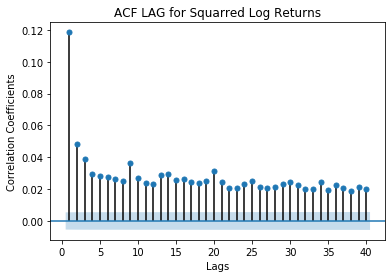

In [43]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.sqrd_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Squarred Log Returns")

In [48]:
#df2.to_csv("HFT_65536_Futures.csv")

Text(0.5, 1.0, 'ACF LAG for Absolute Log Returns')

<Figure size 2160x1440 with 0 Axes>

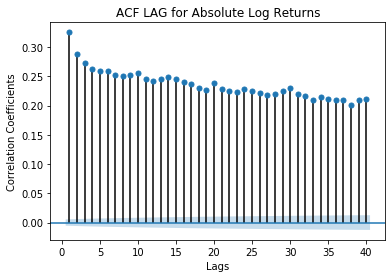

In [44]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.abs_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Absolute Log Returns")

In [45]:
s = pd.Series(df2['close'])

In [46]:
s.autocorr(lag=1)

0.9999848264063438

In [47]:
s.autocorr(lag=2) 

0.9999711423897583

In [48]:
s.autocorr(lag=3) 

0.9999575122751128

In [49]:
s.autocorr(lag=4) 

0.9999441243669306

In [50]:
s.autocorr(lag=5)

0.9999304808049196

In [51]:
s = pd.Series(df2['logReturn'])

In [52]:
s.autocorr(lag=1)

-0.04896783163170285

In [53]:
s.autocorr(lag=2) 

-0.0010664515922179606

In [54]:
s.autocorr(lag=3) 

-0.008434453635048059

In [55]:
s.autocorr(lag=4) 

0.009172065633724327

In [56]:
s.autocorr(lag=5)

-0.00797418808835451

In [57]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2019-01-01 18:02:00,2501.25,NaN,NaN,NaN
2019-01-01 18:03:00,2504.50,0.001299,1.686120e-06,0.001299
2019-01-01 18:04:00,2508.50,0.001596,2.546741e-06,0.001596
2019-01-01 18:05:00,2507.25,-0.000498,2.484324e-07,0.000498
2019-01-01 18:06:00,2507.50,0.000100,9.941260e-09,0.000100
...,...,...,...,...
2019-05-17 08:45:00,2847.25,-0.000176,3.083277e-08,0.000176
2019-05-17 08:46:00,2847.50,0.000088,7.708869e-09,0.000088
2019-05-17 08:47:00,2847.00,-0.000176,3.083818e-08,0.000176


In [58]:
s = pd.Series(df2['sqrd_return'])

In [59]:
s.autocorr(lag=1)

0.11856434139303887

In [60]:
s.autocorr(lag=2) 

0.04851905176759404

In [61]:
s.autocorr(lag=3) 

0.039075488752815836

In [62]:
s.autocorr(lag=4) 

0.029239090845689295

In [63]:
s.autocorr(lag=5)

0.02807368301041367

In [64]:
s = pd.Series(df2['abs_return'])

In [65]:
s.autocorr(lag=1)

0.3254269831814768

In [66]:
s.autocorr(lag=2) 

0.2886012258897097

In [67]:
s.autocorr(lag=3) 

0.27325907297691476

In [68]:
s.autocorr(lag=4) 

0.2626182868641103

In [69]:
s.autocorr(lag=5)

0.25865572994916536